In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 32})
sns.set_context("poster", rc={"font.size":34,"axes.titlesize":34,"axes.labelsize":34, "lines.linewidth": 2})  
plt.rcParams['figure.figsize'] = 18, 12

pd.options.display.max_columns = 999
pd.options.display.max_rows = 9999


from datetime import datetime
str(datetime.now())




'2018-08-14 12:06:51.750524'

In [9]:
df = pd.read_csv('../../measurements/Excel Files/task 3/Western Basin/maumeeriver_average.csv', encoding="ISO-8859-1")

In [10]:
df.head()

,Year,Month,Day,Inflow volume [m3 d-1],Inflow temperature [°C],*Suspended sediment concentration [mg m-3],"*Orthophosphate, water, filtered, as phosphorus [mg m-3]","*Phosphorus, water, unfiltered, as phosphorus [mg m-3]","*Phosphorus, water, filtered, as phosphorus [mg m-3]","*Orthophosphate, water, filtered, as PO4 [mg m-3]",Inflow concentration of chlorophyll-a (Chla-P) [mg m-3],Inflow concentration of dissolved organic carbon (DOC) [mg m-3],Inflow concentration of dissolved inorganic carbon (DIC) [mg m-3],Inflow concentration of O2 [mg m-3],Inflow concentration of NO3 [mg m-3],Inflow concentration of NH4 [mg m-3],Inflow concentration of SO4 [mg m-3],Inflow concentration of aqueous iron (Fe2+) [mg m-3],Inflow concentration of Ca2+ [mg m-3],Inflow pH [-],Inflow concentration of CH4 [mg m-3],Inflow concentration of total solid iron (Fe3+) [mg m-3],Inflow concentration of aluminum (Al3+) [mg m-3],Inflow concentration of dissolved silica [mg m-3],"*Iron, suspended sediment, recoverable [mg m-3]","*Iron, water, unfiltered, recoverable [mg m-3]","*Iron, water, filtered [mg m-3]","*Suspended solids, water, unfiltered [mg m-3]"
0,1980,1,1,2.071026e+07,NaN,57000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1980,1,2,1.685691e+07,NaN,36000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1980,1,3,1.293015e+07,2.0,32000.0,NaN,220.0,110.0,NaN,NaN,7700.0,NaN,14100.0,NaN,10.0,62000.0,NaN,72000.0,7.7,NaN,NaN,NaN,7400.0,2600.0,2600.0,40.0,NaN
3,1980,1,4,1.012882e+07,NaN,28000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1980,1,5,8.159329e+06,NaN,31000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
from datetime import datetime
df['Date'] = df.apply(lambda x:datetime.strptime("{0} {1} {2} 00:00:00".format(int(x['Year']), int(x['Month']), int(x['Day'])), "%Y %m %d %H:%M:%S"),axis=1)

In [12]:
df.describe()

,Year,Month,Day,Inflow volume [m3 d-1],Inflow temperature [°C],*Suspended sediment concentration [mg m-3],"*Orthophosphate, water, filtered, as phosphorus [mg m-3]","*Phosphorus, water, unfiltered, as phosphorus [mg m-3]","*Phosphorus, water, filtered, as phosphorus [mg m-3]","*Orthophosphate, water, filtered, as PO4 [mg m-3]",Inflow concentration of chlorophyll-a (Chla-P) [mg m-3],Inflow concentration of dissolved organic carbon (DOC) [mg m-3],Inflow concentration of dissolved inorganic carbon (DIC) [mg m-3],Inflow concentration of O2 [mg m-3],Inflow concentration of NO3 [mg m-3],Inflow concentration of NH4 [mg m-3],Inflow concentration of SO4 [mg m-3],Inflow concentration of aqueous iron (Fe2+) [mg m-3],Inflow concentration of Ca2+ [mg m-3],Inflow pH [-],Inflow concentration of CH4 [mg m-3],Inflow concentration of total solid iron (Fe3+) [mg m-3],Inflow concentration of aluminum (Al3+) [mg m-3],Inflow concentration of dissolved silica [mg m-3],"*Iron, suspended sediment, recoverable [mg m-3]","*Iron, water, unfiltered, recoverable [mg m-3]","*Iron, water, filtered [mg m-3]","*Suspended solids, water, unfiltered [mg m-3]"
count,13540.000000,13540.000000,13540.000000,1.354000e+04,5994.000000,8.280000e+03,558.000000,3253.000000,245.000000,558.000000,5.0000,169.000000,74.000000,5538.000000,33.000000,579.000000,347.000000,0.0,260.000000,3312.000000,0.0,0.0,51.000000,237.000000,9.000000,11.000000,219.000000,15.000000
mean,1998.035081,6.512482,15.725332,1.374651e+07,13.374920,8.409676e+04,72.790323,246.418562,71.959184,222.969534,37.3200,7369.763314,54.459459,10659.444465,24862.151515,100.190415,61054.178674,NaN,58830.384615,8.146863,NaN,NaN,38.431373,6408.481013,2264.444444,2282.727273,37.269863,226800.000000
std,10.699373,3.453862,8.798839,2.191189e+07,9.449523,1.236383e+05,60.931637,192.457537,53.496729,186.951488,15.2775,1704.619408,59.475836,2509.107705,11400.628503,129.546232,25710.511921,NaN,14991.562616,0.407698,NaN,NaN,47.639167,31671.987687,3368.174992,3111.488682,55.681714,161717.213502
min,1980.000000,1.000000,1.000000,1.345617e+05,-0.100000,1.000000e+03,4.000000,8.000000,10.000000,11.000000,18.9000,4500.000000,30.000000,4300.000000,171.000000,9.000000,10100.000000,NaN,17000.000000,7.000000,NaN,NaN,10.000000,10.000000,340.000000,340.000000,0.000000,5000.000000
25%,1989.000000,4.000000,8.000000,1.947474e+06,4.100000,2.300000e+04,20.000000,140.000000,20.000000,55.000000,29.9000,6440.000000,30.000000,8600.000000,15300.000000,26.000000,42750.000000,NaN,47150.000000,7.800000,NaN,NaN,10.000000,1700.000000,650.000000,600.000000,10.000000,102000.000000
50%,1998.000000,7.000000,16.000000,5.198973e+06,13.300000,4.100000e+04,66.000000,197.000000,70.000000,202.000000,31.5000,7100.000000,30.000000,10700.000000,24900.000000,52.000000,58000.000000,NaN,58750.000000,8.200000,NaN,NaN,20.000000,5030.000000,960.000000,990.000000,19.000000,220000.000000
75%,2007.000000,10.000000,23.000000,1.519629e+07,22.500000,8.700000e+04,111.000000,278.000000,110.000000,344.625000,51.7000,7860.000000,47.500000,12700.000000,34200.000000,117.500000,76000.000000,NaN,68975.000000,8.400000,NaN,NaN,40.000000,6700.000000,2200.000000,2400.000000,36.400000,352500.000000
max,2017.000000,12.000000,31.000000,2.566458e+08,31.300000,1.880000e+06,402.000000,4600.000000,350.000000,1230.000000,54.6000,15900.000000,390.000000,20000.000000,49100.000000,1200.000000,160000.000000,NaN,99000.000000,9.400000,NaN,NaN,230.000000,490000.000000,11000.000000,11000.000000,378.000000,514000.000000


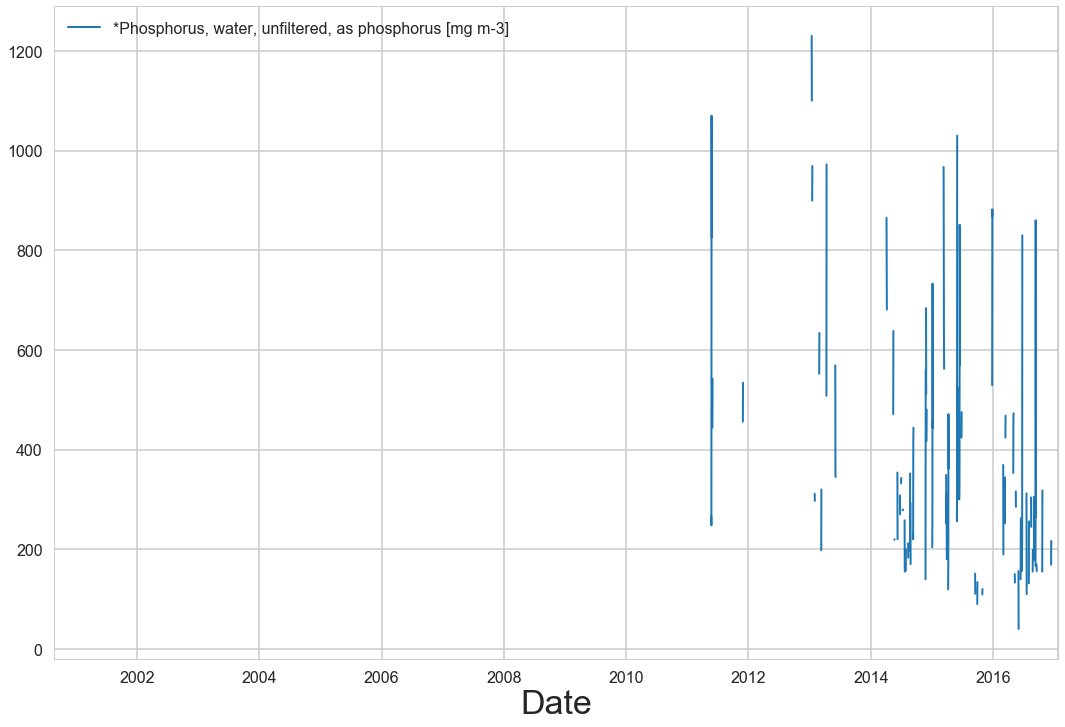

In [13]:
df[-6000:].plot(x='Date', y='*Phosphorus, water, unfiltered, as phosphorus [mg m-3]')

In [14]:
gdf = df.groupby(['Year']).mean()[-18:]

In [17]:
gdf['P load'] = gdf['*Phosphorus, water, unfiltered, as phosphorus [mg m-3]']*gdf['Inflow volume [m3 d-1]']

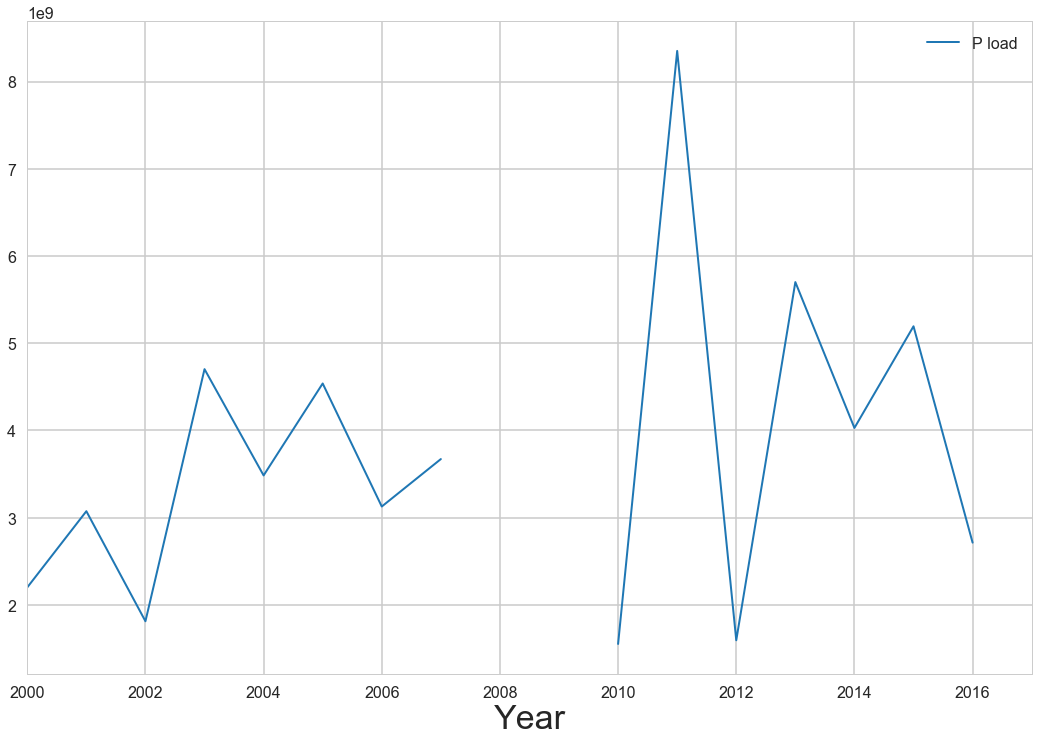

In [18]:
gdf.plot(y='P load')